In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Indiv(object):
    def __init__(self, genome):
        self.__genome = genome
        self.__fitness = None
        self.__notDominated = None
        
    def getGenome(self):
        return self.__genome
        
    def setFitness(self, fitness):
        self.__fitness = fitness
    
    def getFitness(self):
        return self.__fitness
    
    def setNotDominated(self, notDominated):
        self.__notDominated = notDominated
    
    def getNotDominated(self):
        return self.__notDominated
    
    def __eq__(self, other):
        return isinstance(other, Indiv) and self.getGenome() == other.getGenome()

    def __hash__(self):
        return hash(tuple(self.getGenome().reshape(-1)))
    
    def __str__(self):
        return "Genome: %s ,  Fitness: %s " \
               %(self.__genome, self.__fitness)

In [3]:
class IndivFunctions:
    def __init__(self):
        self.__len = 2
        self.__max = np.ones(self.__len)*3*60
        self.__min = np.ones(self.__len)*5
        pass
    
    def __generateGen(self):
        genoma = np.array([ np.random.randint(mi, ma+1) for ma,mi in zip(self.__max,self.__min)])
        return genoma
    
    def __crossingGen(self, genoma1, genoma2):
        a = np.random.randint(0, 2, size = self.__len)
        b = np.abs(a-1)
        return genoma1 * a + genoma2 * b
    
    def __mutationGen(self, genoma1):
        genoma2 = self.__generateGen()
        return self.__crossingGen(genoma1, genoma2)
    
    def __generateIndivGen(self, genoma):
        newI = Indiv(genoma)
        return newI
        
    def generateIndiv(self):
        genoma = self.__generateGen()
        return self.__generateIndivGen(genoma)
    
    def crossingIndiv(self, indiv1, indiv2):
        genoma = self.__crossingGen(indiv1.getGenome(), indiv2.getGenome())
        return self.__generateIndivGen(genoma)
    
    def mutationIndiv(self, indivP):
        genoma = self.__mutationGen(indivP.getGenome())
        return self.__generateIndivGen(genoma)
        
    def functionFitness(self, genoma):
        return float(np.mean(genoma))
    

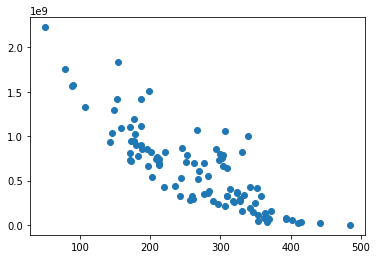

In [12]:
maxVar = 3*60
minVar = 6

inP = [
    {
        'x': np.random.randint(minVar, maxVar+1),
        'y': np.random.randint(minVar, maxVar+1),
        'z': np.random.randint(minVar, maxVar+1)
    } for i in range(100)]

for iob in range(len(inP)):
    i,j,k = inP[iob]['x'],inP[iob]['y'],inP[iob]['z']
    inP[iob]['f1'] = 3*maxVar-(abs(i))-(abs(j))-(abs(k))
    inP[iob]['f2'] = ((i)**4)+((j)**4)+((k)**4)
    
    
data = pd.DataFrame(inP)    
plt.plot(data.f1, data.f2, "o")
plt.show()

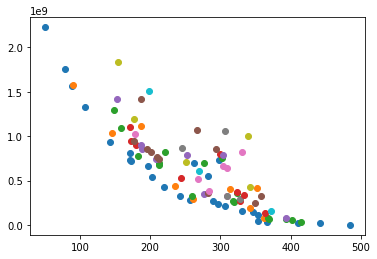

In [13]:
data['range'] = -1

lenT = data.shape[0]

for i in range(data.shape[0]):
    dat = data[(data.loc[i].f1 <= data.f1) | (data.loc[i].f2 <= data.f2)]
    data.loc[i].range = lenT - dat.shape[0]


for dat2,dat in data.groupby(['range']):
    plt.plot(dat.f1, dat.f2, "o")
plt.show()